# Description

Script for visualizing the pose estimation data done with charuco board and openCV that are being published to a ROS topic

# Imports

In [1]:
import os
import numpy
import json
import pandas
import matplotlib.pyplot as plt

import rospy
from realsense2_camera.msg import EstimatedPose
from sensor_msgs.msg import Image, CameraInfo

In /home/lars/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lars/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lars/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/lars/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/lars/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

# Configuration

In [2]:
pose = {
    "Position" : {
        "tx" : [],
        "ty" : [],
        "tz" : []
    },
    "Orientation" : {
        "rx" : [],
        "ry" : [],
        "rz" : []
    }
}
t_fields = ["tx", "ty", "tz"]
r_fields = ["rx", "ry", "rz"]

# Functions

In [3]:
#def pose_callback(data):
#    global tvec
#    global rvec
#    tvec = numpy.asarray([data.tx, data.ty, data.tz])
#    rvec = numpy.asarray([data.rx, data.ry, data.rz])
    
def pose_callback(data):
    global tx
    global ty
    global tz
    global rx
    global ry
    global rz
    
    tx = data.tx
    ty = data.ty
    tz = data.tz
    rx = data.rx
    ry = data.ry
    rz = data.rz
    
def plot_dataframe(dataframe, fields, choose):
    '''Plotting the given fields of the given dataframe'''
    if choose == "position":
        for field in fields:
            plt.rcParams["figure.figsize"] = (30,8)
            plt.plot(dataframe[field])
            plt.legend(fields)
            plt.grid()
            plt.xlabel("Time")
            plt.ylabel("Position")
        plt.show()
    else:
        for field in fields:
            plt.rcParams["figure.figsize"] = (30,8)
            plt.plot(dataframe[field])
            plt.legend(fields)
            plt.grid()
            plt.xlabel("Time")
            plt.ylabel("Orientation")
        plt.show()

# Main

In [4]:
rospy.init_node("pose_analyzer", anonymous=True)
rospy.Subscriber("/pose_estimation", EstimatedPose, pose_callback)
rate = rospy.Rate(30)

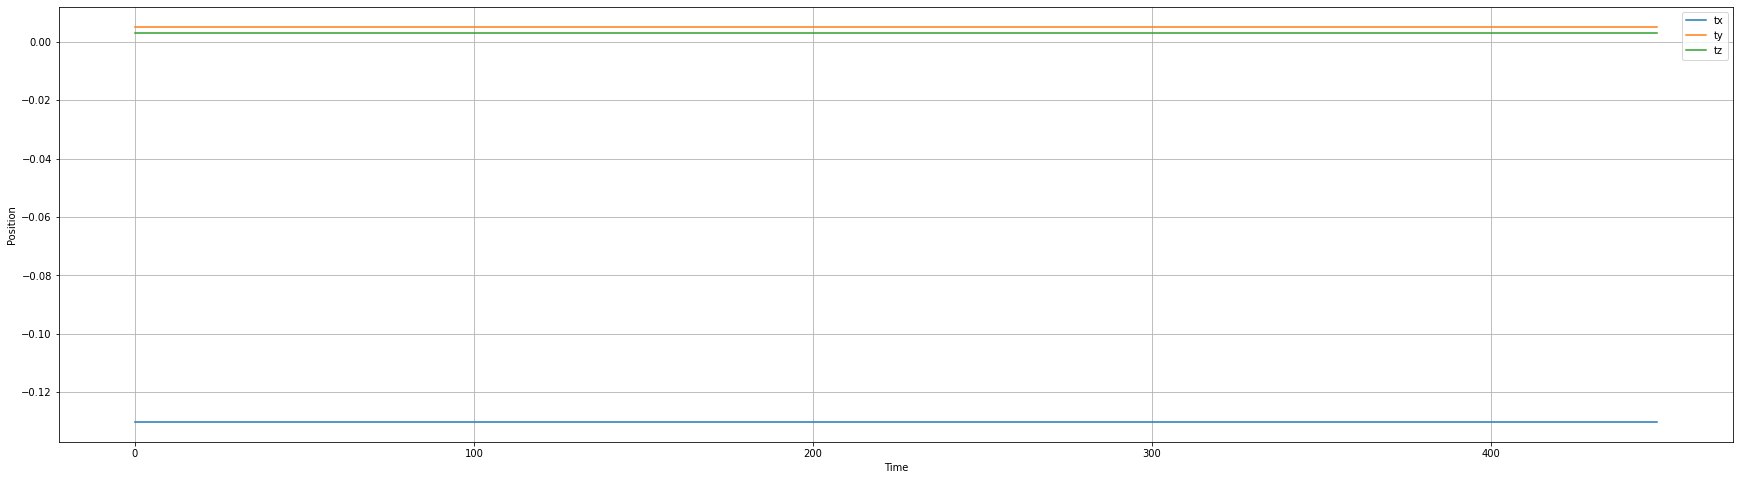

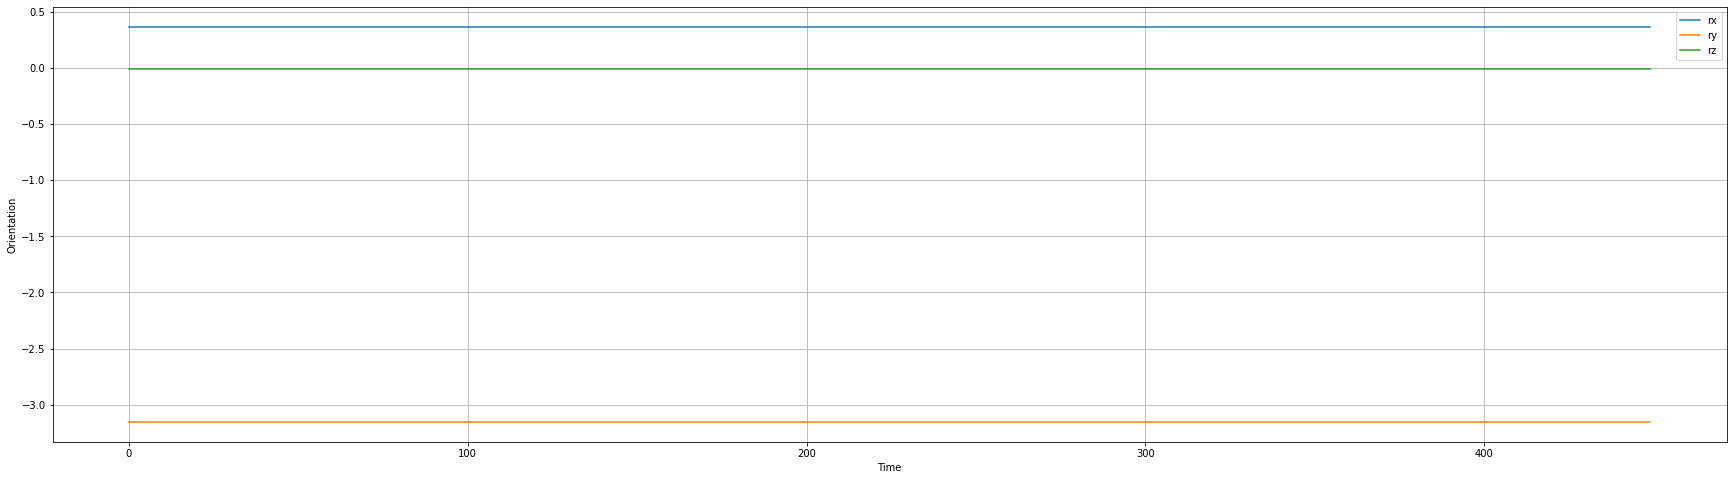

In [5]:
for i in range(30*15):
    pose["Position"]["tx"].append(tx)
    pose["Position"]["ty"].append(ty)
    pose["Position"]["tz"].append(tz)
    pose["Orientation"]["rx"].append(rx)
    pose["Orientation"]["ry"].append(ry)
    pose["Orientation"]["rz"].append(rz)
    rate.sleep()
    
    
translation_df = pandas.DataFrame(pose["Position"], columns = ["tx", "ty", "tz"])
rotation_df = pandas.DataFrame(pose["Orientation"], columns = ["rx", "ry", "rz"])

plot_dataframe(translation_df, t_fields, choose = "position")
plot_dataframe(rotation_df, r_fields, choose = "orientation")